# 교통사고 데이터 분석

## 1. 문제 정의 및 가설 수립
### 문제 정의
- 한 해의 교통사고 정보

### 가설 수립
- 쉬는 날이 많은 5월이나 10월의 교통사고량이 많을 것이다.
- 사망자수, 중상자수, 경상자수끼리는 상관관계가 클 것이다.
- 사람이랑 차가 부딫힌 사고가 가장 많을 것이다.

## 2. 데이터 가져오기

출처: https://www.data.go.kr/data/15070290/fileData.do

In [1]:
!curl -L -o ../data/traffic_accident.csv "https://www.data.go.kr/cmm/cmm/fileDownload.do?atchFileId=FILE_000000002360152&fileDetailSn=1&dataNm=%EB%8F%84%EB%A1%9C%EA%B5%90%ED%86%B5%EA%B3%B5%EB%8B%A8_%EC%82%AC%EA%B3%A0%EC%9C%A0%ED%98%95%EB%B3%84%20%EC%9B%94%EB%B3%84%20%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0%20%ED%86%B5%EA%B3%84_20191231"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9992    0  9992    0     0  49465      0 --:--:-- --:--:-- --:--:-- 49465


## 3. 데이터 로드하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Nanum Gothic'

In [4]:
# 인코딩이 utf-8이 아닌 euc-kr로 되어있어서 지정해 줌
df = pd.read_csv('../data/traffic_accident.csv', encoding='euc-kr')

In [5]:
df.head()

,사고유형대분류,사고유형중분류,사고유형,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,1,1532,69,841,650,61
1,차대사람,횡단중,횡단중,2,1201,40,599,594,39
2,차대사람,횡단중,횡단중,3,1453,47,736,709,61
3,차대사람,횡단중,횡단중,4,1604,55,778,783,73
4,차대사람,횡단중,횡단중,5,1516,61,751,715,85


## 4. 데이터 살펴보기
* 전처리 과정
  * 결측값 확인
  * 개수 확인

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사고유형대분류  210 non-null    object
 1   사고유형중분류  210 non-null    object
 2   사고유형     210 non-null    object
 3   월        210 non-null    int64 
 4   사고건수     210 non-null    int64 
 5   사망자수     210 non-null    int64 
 6   중상자수     210 non-null    int64 
 7   경상자수     210 non-null    int64 
 8   부상신고자수   210 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 14.9+ KB


In [7]:
df.describe()

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,6.490476,1093.333333,15.947619,344.314286,1169.161905,113.723810
std,3.446433,1795.046438,16.758690,509.755065,2206.423240,196.304494
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.250000,42.000000,2.250000,22.500000,19.250000,7.000000
50%,6.500000,293.500000,10.000000,120.000000,200.500000,25.000000
75%,9.000000,1448.500000,24.750000,536.750000,780.750000,80.750000
max,12.000000,7806.000000,69.000000,2313.000000,9222.000000,836.000000


In [8]:
df.head()

,사고유형대분류,사고유형중분류,사고유형,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,1,1532,69,841,650,61
1,차대사람,횡단중,횡단중,2,1201,40,599,594,39
2,차대사람,횡단중,횡단중,3,1453,47,736,709,61
3,차대사람,횡단중,횡단중,4,1604,55,778,783,73
4,차대사람,횡단중,횡단중,5,1516,61,751,715,85


In [9]:
df.tail()

,사고유형대분류,사고유형중분류,사고유형,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
205,철길건널목,철길건널목,철길건널목,6,1,0,1,0,0
206,철길건널목,철길건널목,철길건널목,7,1,0,2,0,0
207,철길건널목,철길건널목,철길건널목,8,1,0,1,0,0
208,철길건널목,철길건널목,철길건널목,9,1,2,0,0,0
209,철길건널목,철길건널목,철길건널목,10,2,0,3,4,0


In [10]:
# 결측값 확인
df.isnull().sum()

사고유형대분류    0
사고유형중분류    0
사고유형       0
월          0
사고건수       0
사망자수       0
중상자수       0
경상자수       0
부상신고자수     0
dtype: int64

In [11]:
df['월'].value_counts()

2     18
3     18
6     18
7     18
9     18
10    18
1     17
4     17
5     17
8     17
11    17
12    17
Name: 월, dtype: int64

In [12]:
df.groupby('사고유형')['월'].count()

사고유형
공작물충돌         12
기타            36
길가장자리구역통행중    12
도로이탈 기타       12
도로이탈 추락       12
보도통행중         12
전도            12
전복            12
정면충돌          12
주/정차차량 충돌     11
차도통행중         12
철길건널목          7
추돌            12
측면충돌          12
횡단중           12
후진중충돌         12
Name: 월, dtype: int64

In [13]:
df[df['사고유형'] == '철길건널목']

,사고유형대분류,사고유형중분류,사고유형,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
203,철길건널목,철길건널목,철길건널목,2,1,0,0,1,0
204,철길건널목,철길건널목,철길건널목,3,1,0,1,0,0
205,철길건널목,철길건널목,철길건널목,6,1,0,1,0,0
206,철길건널목,철길건널목,철길건널목,7,1,0,2,0,0
207,철길건널목,철길건널목,철길건널목,8,1,0,1,0,0
208,철길건널목,철길건널목,철길건널목,9,1,2,0,0,0
209,철길건널목,철길건널목,철길건널목,10,2,0,3,4,0


이 데이터를 보면 철길건널목에서 월이 빠져있는 것을 알 수 있다.  
하지만 아래 결과에서 볼 수 있다 싶이 철길 사고는 그리 많지 않다.  
그러므로 비어있는 월은 해당 사고가 발생하지 않았다고 예상할 수 있다.  
평균을 계산할 때 오차가 생길 수 있으므로 빈 데이터로 채워넣어줘야 한다.

In [14]:
empty_df = pd.DataFrame([['철길건널목', '철길건널목', '철길건널목', month, 0, 0, 0, 0, 0] for month in [1, 4, 5, 8, 11, 12]], columns=df.columns)
empty_df

,사고유형대분류,사고유형중분류,사고유형,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,철길건널목,철길건널목,철길건널목,1,0,0,0,0,0
1,철길건널목,철길건널목,철길건널목,4,0,0,0,0,0
2,철길건널목,철길건널목,철길건널목,5,0,0,0,0,0
3,철길건널목,철길건널목,철길건널목,8,0,0,0,0,0
4,철길건널목,철길건널목,철길건널목,11,0,0,0,0,0
5,철길건널목,철길건널목,철길건널목,12,0,0,0,0,0


In [15]:
df = pd.concat([df, empty_df], ignore_index=True)

In [16]:
df.tail()

,사고유형대분류,사고유형중분류,사고유형,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
211,철길건널목,철길건널목,철길건널목,4,0,0,0,0,0
212,철길건널목,철길건널목,철길건널목,5,0,0,0,0,0
213,철길건널목,철길건널목,철길건널목,8,0,0,0,0,0
214,철길건널목,철길건널목,철길건널목,11,0,0,0,0,0
215,철길건널목,철길건널목,철길건널목,12,0,0,0,0,0


In [17]:
df['월'].value_counts()

1     18
2     18
3     18
4     18
5     18
6     18
7     18
8     18
9     18
10    18
11    18
12    18
Name: 월, dtype: int64

In [18]:
# 사고유형중분류와 사고유형이 같은 것이 많아서 가져와 보았다.
df[df['사고유형중분류'] != df['사고유형']]

,사고유형대분류,사고유형중분류,사고유형,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
167,차량단독,도로이탈,도로이탈 추락,1,33,7,11,23,4
168,차량단독,도로이탈,도로이탈 추락,2,36,5,24,12,4
169,차량단독,도로이탈,도로이탈 추락,3,37,13,16,15,1
170,차량단독,도로이탈,도로이탈 추락,4,41,13,19,14,5
171,차량단독,도로이탈,도로이탈 추락,5,48,10,27,17,7
172,차량단독,도로이탈,도로이탈 추락,6,31,7,17,13,2
173,차량단독,도로이탈,도로이탈 추락,7,32,4,16,13,10
174,차량단독,도로이탈,도로이탈 추락,8,42,9,35,20,6
175,차량단독,도로이탈,도로이탈 추락,9,38,4,17,16,5
176,차량단독,도로이탈,도로이탈 추락,10,42,11,21,19,6


In [19]:
# 도로이탈 추락과 도로이탈 기타가 있으므로 사고유형중분류 대신 사고유형을 EDA시 사용할 것이다.
df.loc[df['사고유형중분류'] == '도로이탈', '사고유형'].unique()

array(['도로이탈 추락', '도로이탈 기타'], dtype=object)

In [20]:
# 사고유형중분류 컬럼 삭제
df = df.drop(['사고유형중분류'], axis=1)

In [21]:
# 사람 수 분석을 위한 데이터를 추가해서 정리한다.
# https://stackoverflow.com/questions/40877135/plotting-two-columns-of-dataframe-in-seaborn
melted_df = df.melt(id_vars=['사고유형대분류', '사고유형', '월'])
melted_df

,사고유형대분류,사고유형,월,variable,value
0,차대사람,횡단중,1,사고건수,1532
1,차대사람,횡단중,2,사고건수,1201
2,차대사람,횡단중,3,사고건수,1453
3,차대사람,횡단중,4,사고건수,1604
4,차대사람,횡단중,5,사고건수,1516
...,...,...,...,...,...
1075,철길건널목,철길건널목,4,부상신고자수,0
1076,철길건널목,철길건널목,5,부상신고자수,0
1077,철길건널목,철길건널목,8,부상신고자수,0
1078,철길건널목,철길건널목,11,부상신고자수,0


## 5. EDA(탐색적 데이터 분석)

In [22]:
# 시각화 한 것을 저장하기 위한 용도
!mkdir fig

mkdir: fig: File exists


### 1. 교통사고 유형별 분석

In [23]:
# [사고유형대분류, 사고유형중분류]의 고유값들을 가져온다.
[df[column].unique() for column in df.columns[:2]]

[array(['차대사람', '차대차', '차량단독', '철길건널목'], dtype=object),
 array(['횡단중', '차도통행중', '길가장자리구역통행중', '보도통행중', '기타', '정면충돌', '측면충돌',
        '후진중충돌', '추돌', '전도', '전복', '공작물충돌', '주/정차차량 충돌', '도로이탈 추락',
        '도로이탈 기타', '철길건널목'], dtype=object)]

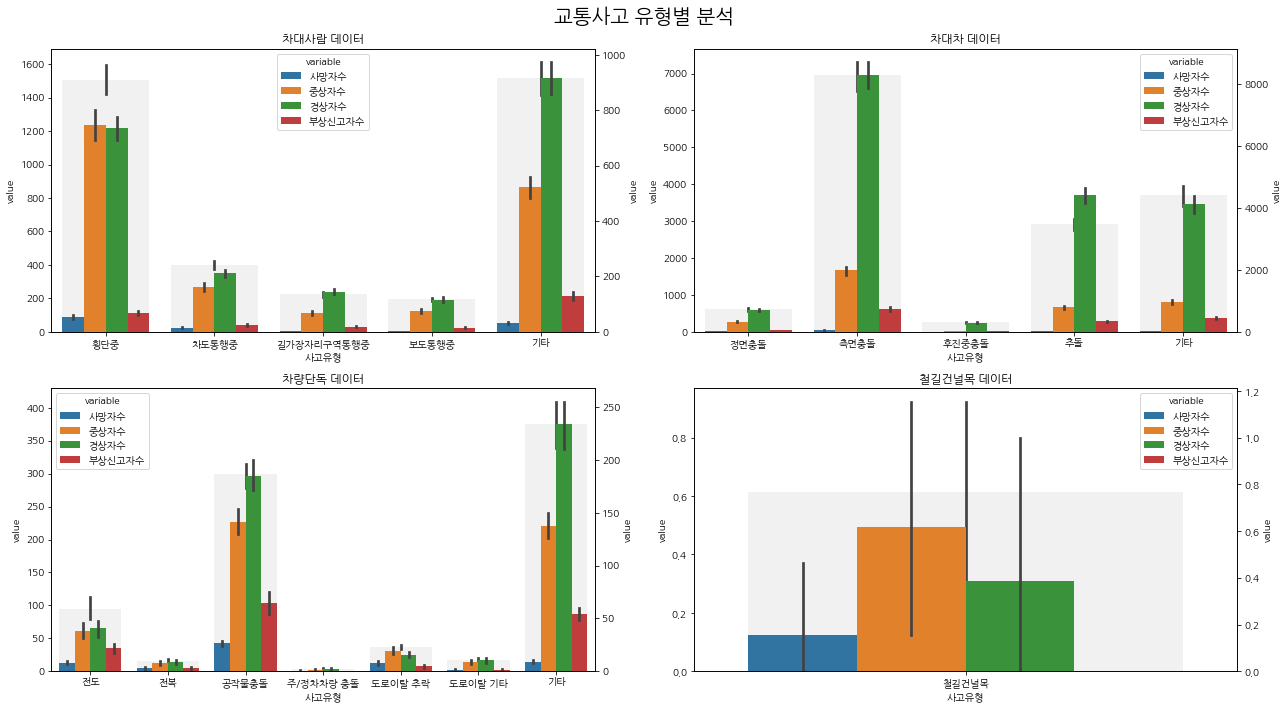

In [24]:
# 사이즈 설정
plt.figure(figsize=(18, 10))

def show_bar_plot(index: int, category: str):
  plt.subplot(2, 2, index)

  # https://stackoverflow.com/questions/54781243/hide-legend-from-seaborn-pairplot
  g = sns.barplot(x='사고유형', y='value', hue='variable', data=melted_df[(melted_df['사고유형대분류'] == category) & (melted_df['variable'] == '사고건수')], color='gray')
  # 범례 제거
  g.legend_.remove()
  
  # 보조축 사용
  plt.twinx()
  sns.barplot(x='사고유형', y='value', hue='variable', data=melted_df[(melted_df['사고유형대분류'] == category) & (melted_df['variable'] != '사고건수')])
  plt.xticks(rotation=45)
  plt.title(f'{category} 데이터')

show_bar_plot(1, '차대사람')
show_bar_plot(2, '차대차')
show_bar_plot(3, '차량단독')
show_bar_plot(4, '철길건널목')
plt.suptitle('교통사고 유형별 분석', size=20)
plt.tight_layout()
plt.savefig('./fig/교통사고_유형별_분석.png')
plt.show()

In [25]:
group_by_accident_category_sum = df.groupby('사고유형대분류').sum()
group_by_accident_category_sum

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
사고유형대분류,,,,,,
차대사람,390,46150,1271,18860,25481,3065
차대차,390,173328,1395,49168,214081,19007
차량단독,538,10114,681,4270,5957,1810
철길건널목,86,8,2,8,5,0


In [26]:
# 그래프로 표시할 수 있게 데이터 유형에 따라서 분류한다.
data = group_by_accident_category_sum.reset_index().melt(id_vars=['사고유형대분류', '월'])
data

,사고유형대분류,월,variable,value
0,차대사람,390,사고건수,46150
1,차대차,390,사고건수,173328
2,차량단독,538,사고건수,10114
3,철길건널목,86,사고건수,8
4,차대사람,390,사망자수,1271
5,차대차,390,사망자수,1395
6,차량단독,538,사망자수,681
7,철길건널목,86,사망자수,2
8,차대사람,390,중상자수,18860
9,차대차,390,중상자수,49168


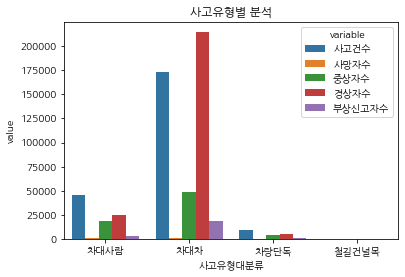

In [27]:
sns.barplot(x='사고유형대분류', y='value', hue='variable', data=data)
plt.title('사고유형별 분석')
plt.savefig('./fig/사고유형별_분석.png')
plt.show()

차대차 사고가 가장 많은 것을 볼 수 있다.  
따라서 사람과 차가 부딫힌 사고가 가장 많을 것이라는 가설은 틀렸다.

### 2. 사람 유형별 분석
* 사망자, 중상자, 경상자, 부상신고자 별로 분석한다.

In [28]:
# 사람 유형별로 묶어서 합계를 구한다.
person_type_df = melted_df[melted_df['variable'] != '사고건수'].groupby('variable')['value'].sum().to_frame().reset_index()
person_type_df

,variable,value
0,경상자수,245524
1,부상신고자수,23882
2,사망자수,3349
3,중상자수,72306


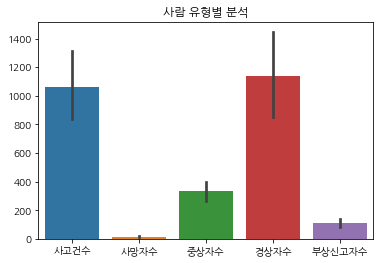

In [29]:
sns.barplot(x='variable', y='value', data=melted_df)
plt.title('사람 유형별 분석')
plt.xlabel('')
plt.ylabel('')
plt.savefig('./fig/사람_유형별_분석.png')
plt.show()

In [30]:
corr_df = df.drop(['월'], axis=1).corr()
corr_df

,사고건수,사망자수,중상자수,경상자수,부상신고자수
사고건수,1.000000,0.673195,0.983596,0.983280,0.986004
사망자수,0.673195,1.000000,0.771354,0.594094,0.601611
중상자수,0.983596,0.771354,1.000000,0.947380,0.949312
경상자수,0.983280,0.594094,0.947380,1.000000,0.986096
부상신고자수,0.986004,0.601611,0.949312,0.986096,1.000000


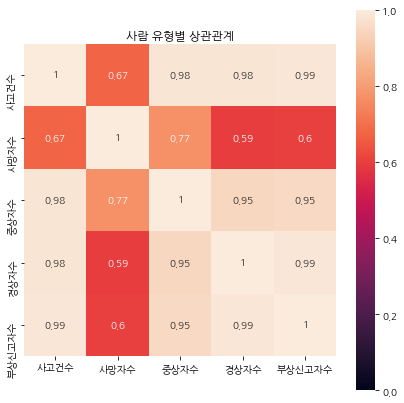

In [31]:
plt.figure(figsize=(7, 7))
sns.heatmap(corr_df, annot=True, vmin=0, vmax=1, square=True)
plt.title('사람 유형별 상관관계')
plt.savefig('./fig/사람_유형별_상관관계.png')
plt.show()

사망자수, 중상자수, 경상자수 끼리는 상관관계가 클 것이라는 가설은 맞다.

### 3. 월별 분석

In [32]:
# 월별로 묶은 사고건수의 합계 중, 가장 높은 월을 가져온다.
df.groupby('월')['사고건수'].sum().idxmax()

10

In [33]:
df.groupby('월')['사고건수'].sum().sort_values(ascending=False)

월
10    21690
11    21517
5     20779
8     19992
12    19548
9     19331
7     19234
4     19104
6     18968
3     18133
1     16552
2     14752
Name: 사고건수, dtype: int64

In [34]:
# 월별로 묶은 다음 합계를 구한다.
group_by_month_sum = df.groupby('월').sum().reset_index().melt(id_vars=['월'])
group_by_month_sum.head()

,월,variable,value
0,1,사고건수,16552
1,2,사고건수,14752
2,3,사고건수,18133
3,4,사고건수,19104
4,5,사고건수,20779


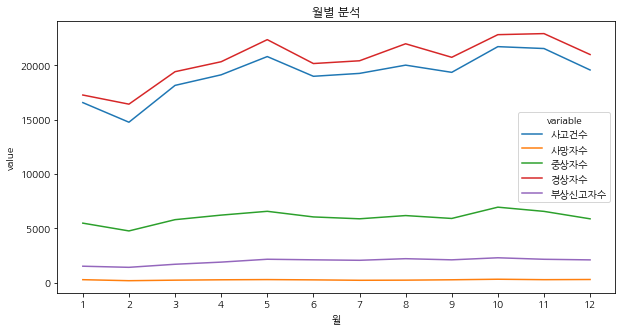

In [35]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='월', hue='variable', y='value', data=group_by_month_sum)
plt.title('월별 분석')
# 모든 달을 표시하기 위함
plt.xticks(np.arange(1, 13))
plt.savefig('./fig/월별_분석.png')
plt.show()

따라서 10월의 사고가 가장 많다는 가설은 맞다.